# **Facial Expressions Saturdays Ai**

Proyecto de la primera edición de Donostia de Saturdays Ai 2020.


1. Importación de librerías

In [10]:
import numpy as np 
import pandas as pd
import os
import cv2
from tqdm import tqdm
from keras.utils import np_utils

2. Importación data training

In [8]:
labels = []

for i in os.listdir('data/train/0'):
    labels.append(0)
for i in os.listdir('data/train/1'):
    labels.append(1)
for i in os.listdir('data/train/2'):
    labels.append(2)
for i in os.listdir('data/train/3'):
    labels.append(3)
for i in os.listdir('data/train/4'):
    labels.append(4)
for i in os.listdir('data/train/5'):
    labels.append(5)
for i in os.listdir('data/train/6'):
    labels.append(6)

In [9]:
#feature extraction on training data

loc1 = 'data/train/0'
loc2 = 'data/train/1'
loc3 = 'data/train/2'
loc4 = 'data/train/3'
loc5 = 'data/train/4'
loc6 = 'data/train/5'
loc7 = 'data/train/6'

features = []

for i in tqdm(os.listdir(loc1)):
    features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 4965/4965 [00:58<00:00, 84.98it/s] 


In [11]:
labels_test = []
for i in os.listdir('data/test/0'):
    labels_test.append(0)
for i in os.listdir('data/test/1'):
    labels_test.append(1)
for i in os.listdir('data/test/2'):
    labels_test.append(2)
for i in os.listdir('data/test/3'):
    labels_test.append(3)
for i in os.listdir('data/test/4'):
    labels_test.append(4)
for i in os.listdir('data/test/5'):
    labels_test.append(5)
for i in os.listdir('data/test/6'):
    labels_test.append(6)

In [12]:
#feature extraction on testing data

loc1 = 'data/test/0'
loc2 = 'data/test/1'
loc3 = 'data/test/2'
loc4 = 'data/test/3'
loc5 = 'data/test/4'
loc6 = 'data/test/5'
loc7 = 'data/test/6'

test_features = []

for i in tqdm(os.listdir(loc1)):
    test_features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    test_features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    test_features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    test_features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    test_features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    test_features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    test_features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 626/626 [00:06<00:00, 96.20it/s] 


In [13]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [14]:
train_data['emotion'] = labels
train_data['pixel_values'] = features
test_data['emotion'] = labels_test
test_data['pixel_values'] = test_features

In [15]:
train_data.head()

,emotion,pixel_values
0,0,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,0,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,0,"[[30, 24, 21, 23, 25, 25, 49, 67, 84, 103, 120..."
3,0,"[[32, 25, 19, 55, 46, 35, 34, 48, 92, 101, 33,..."
4,0,"[[223, 218, 199, 191, 202, 205, 194, 133, 103,..."


In [16]:
test_data.head()

,emotion,pixel_values
0,0,"[[170, 118, 101, 88, 88, 75, 78, 82, 66, 74, 6..."
1,0,"[[138, 142, 66, 80, 87, 92, 97, 99, 88, 73, 72..."
2,0,"[[245, 245, 239, 122, 144, 101, 33, 37, 84, 13..."
3,0,"[[215, 218, 222, 220, 221, 226, 218, 215, 216,..."
4,0,"[[58, 52, 55, 62, 59, 42, 40, 45, 43, 39, 40, ..."


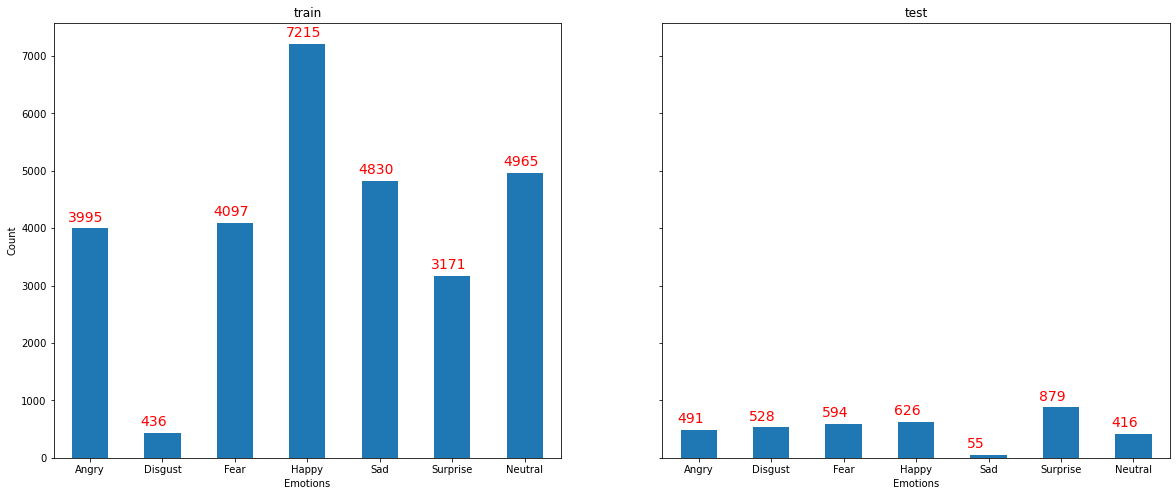

In [17]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
         axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='red',
                    rotation=0)

import matplotlib.pyplot as plt   
fig, axes = plt.subplots(1,2, figsize=(20,8), sharey=True)
setup_axe(axes[0],train_data,'train')
setup_axe(axes[1],test_data,'test')
plt.show()

In [18]:
features = np.array(features).reshape(-1,48,48,1)
test_features = np.array(test_features).reshape(-1,48,48,1)

features = features/255
test_features = test_features/255

labels = np_utils.to_categorical(labels)
labels_test =np_utils.to_categorical(labels_test)

Using TensorFlow backend.


In [19]:
print('Training features shape ',features.shape)
print('Training labels shape',labels.shape)
print('Testing features shape ',test_features.shape)
print('Testing labels shape',labels_test.shape)

Training features shape  (28709, 48, 48, 1)
Training labels shape (28709, 7)
Testing features shape  (3589, 48, 48, 1)
Testing labels shape (3589, 7)
